# **Prediksi Gangguan Pada Transmission Line Berdasarkan Berbagai Kondisi Tegangan dan Arus Pada Sistem 3 Phase**

## 1.Import Library yang dibutuhkan

In [1]:
# Import library untuk menganalisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk Data Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Import model yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


## 2.Data Understanding

### 2.1. Data Loading

Untuk memahami dataset yang akan digunakan, maka diperlukan proses loading data terlebih dahulu

Dataset yang digunakan pada proyek ini yakni
https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification

pada dataset tersebut terdapat dua file csv yakni
1. classData.csv
2. detect_dataset.csv

Adapun dataset yang dipilih penulis hanya dataset nomor 2 yakni *classData.csv*

In [2]:
# Membaca dataset dari detect_dataset.csv
detect_fault = pd.read_csv('/content/classData.csv')
detect_fault

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


### 2.2. Exploratory Data Analysis (EDA)

Exploratory data analysis atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

In [3]:
# Memeriksa setiap informasi pada dataset yang digunakan
detect_fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [4]:
# Melihat parameter statistik dari dataset yang digunakan
detect_fault.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [5]:
# Memeriksa missing value dari dataset yang digunakan
detect_fault.isnull().sum()

,0
G,0
C,0
B,0
A,0
Ia,0
Ib,0
Ic,0
Va,0
Vb,0
Vc,0


In [6]:
# Memeriksa duplikat data pada dataset yang digunakan
detect_fault.duplicated().sum()

0

#### 2.2.1. EDA - Penanganan Missing Value dan Outliers

<Axes: xlabel='G'>

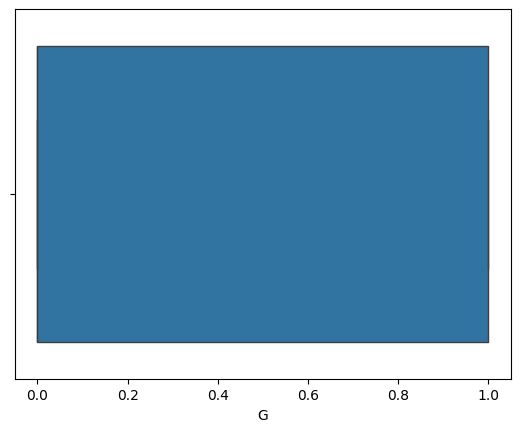

In [7]:
# Memeriksa outliers pada kolom 'G'
sns.boxplot(x = detect_fault['G'])

<Axes: xlabel='C'>

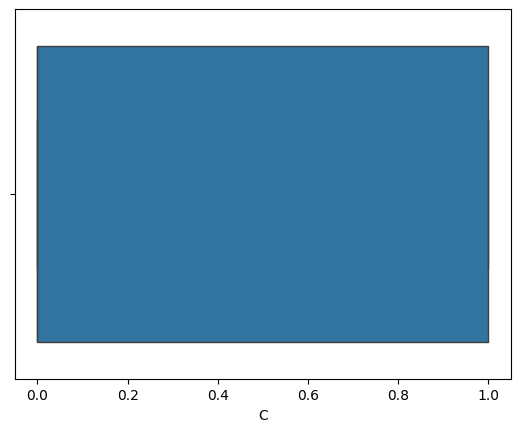

In [8]:
# Memeriksa outliers pada kolom 'C'
sns.boxplot(x = detect_fault['C'])

<Axes: xlabel='B'>

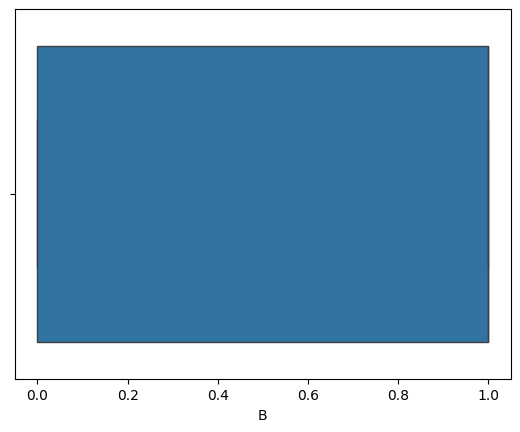

In [9]:
# Memeriksa outliers pada kolom 'B'
sns.boxplot(x = detect_fault['B'])

<Axes: xlabel='A'>

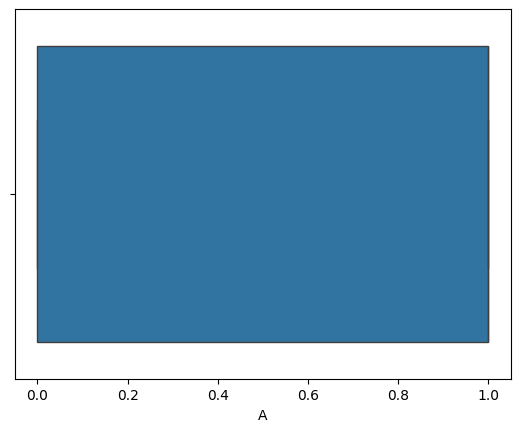

In [10]:
# Memeriksa outliers pada kolom 'A'
sns.boxplot(x = detect_fault['A'])

<Axes: xlabel='Ia'>

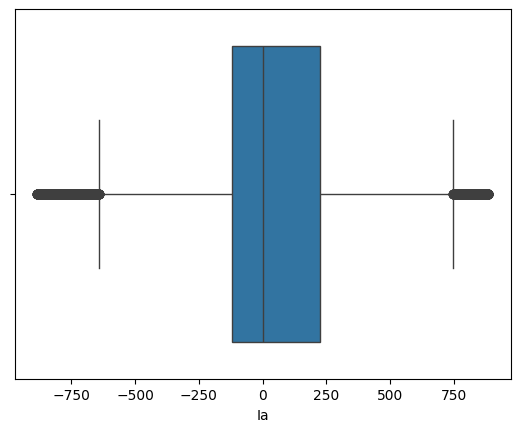

In [11]:
# Memeriksa outliers pada kolom 'Ia'
sns.boxplot(x = detect_fault['Ia'])

<Axes: xlabel='Ib'>

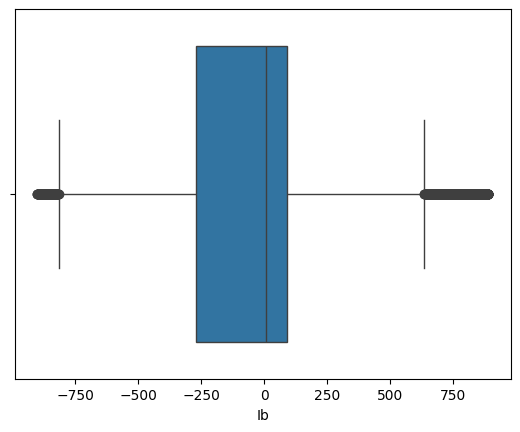

In [12]:
# Memeriksa outliers pada kolom 'Ib'
sns.boxplot(x = detect_fault['Ib'])

<Axes: xlabel='Ic'>

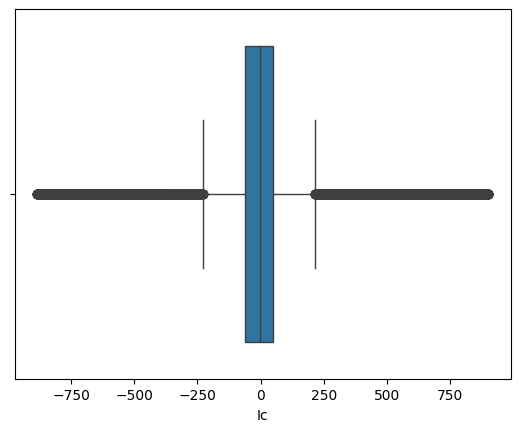

In [13]:
# Memeriksa outliers pada kolom 'Ic'
sns.boxplot(x = detect_fault['Ic'])

<Axes: xlabel='Va'>

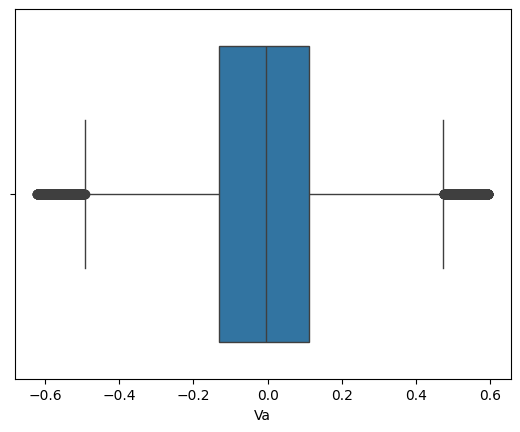

In [14]:
# Memeriksa outliers pada kolom 'Va'
sns.boxplot(x = detect_fault['Va'])

<Axes: xlabel='Vb'>

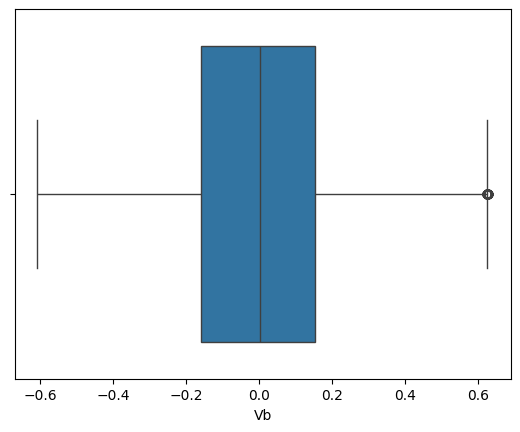

In [15]:
# Memeriksa outliers pada kolom 'Vb'
sns.boxplot(x = detect_fault['Vb'])

<Axes: xlabel='Vc'>

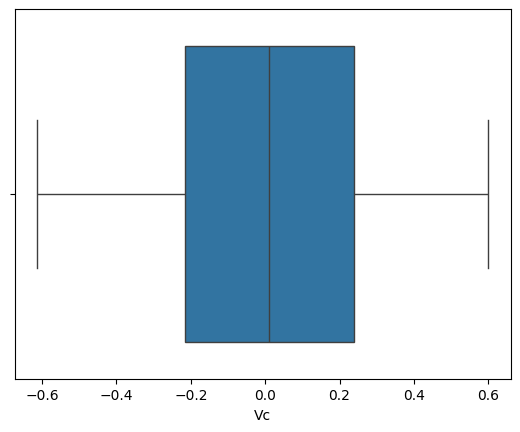

In [16]:
# Memeriksa outliers pada kolom 'Vc'
sns.boxplot(x = detect_fault['Vc'])

In [17]:
# Mengatasi Outliers menggunakan method IQR
numeric_cols = detect_fault.select_dtypes(include=['int64', 'float64']).columns
Q1 = detect_fault[numeric_cols].quantile(0.25)
Q3 = detect_fault[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

detect_fault = detect_fault[~((detect_fault[numeric_cols] < (Q1 - 1.5 * IQR)) | (detect_fault[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
detect_fault.shape

(2669, 10)

In [18]:
detect_fault

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [19]:
# Menggabungkan Kolom G, B, C, A menjadi Kolom Output
fault_map = {
    (1.0, 0.0, 0.0, 1.0): 'LG fault (Between Phase A and Gnd)',
    (0.0, 0.0, 1.0, 1.0): 'LL fault (Between Phase A and Phase B)',
    (1.0, 0.0, 1.0, 1.0): 'LLG Fault (Between Phases A,B and ground)',
    (0.0, 1.0, 1.0, 1.0): 'LLL Fault(Between all three phases)',
    (1.0, 1.0, 1.0, 1.0): 'LLLG fault( Three phase symmetrical fault)',
    (0.0, 0.0, 0.0, 0.0): 'No Fault'
}

# membuat kolom baru bernama 'output' menggunakan fault_map untuk kolom G, B, C, A
detect_fault['Output'] = detect_fault.apply(lambda row: fault_map.get(tuple(row[['G', 'B', 'C', 'A']].values), 'Unknown Fault'), axis=1)

# Melakukan drop original kolom G, B, C, A
detect_fault.drop(columns=['G', 'B', 'C', 'A'], inplace=True)
detect_fault

<ipython-input-19-2f93c46af73c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_fault['Output'] = detect_fault.apply(lambda row: fault_map.get(tuple(row[['G', 'B', 'C', 'A']].values), 'Unknown Fault'), axis=1)
<ipython-input-19-2f93c46af73c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_fault.drop(columns=['G', 'B', 'C', 'A'], inplace=True)


,Ia,Ib,Ic,Va,Vb,Vc,Output
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG fault (Between Phase A and Gnd)
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG fault (Between Phase A and Gnd)
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG fault (Between Phase A and Gnd)
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG fault (Between Phase A and Gnd)
5,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972,LG fault (Between Phase A and Gnd)
...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,No Fault
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,No Fault
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,No Fault
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,No Fault


#### 2.2.2. EDA - Unvariate Analysis

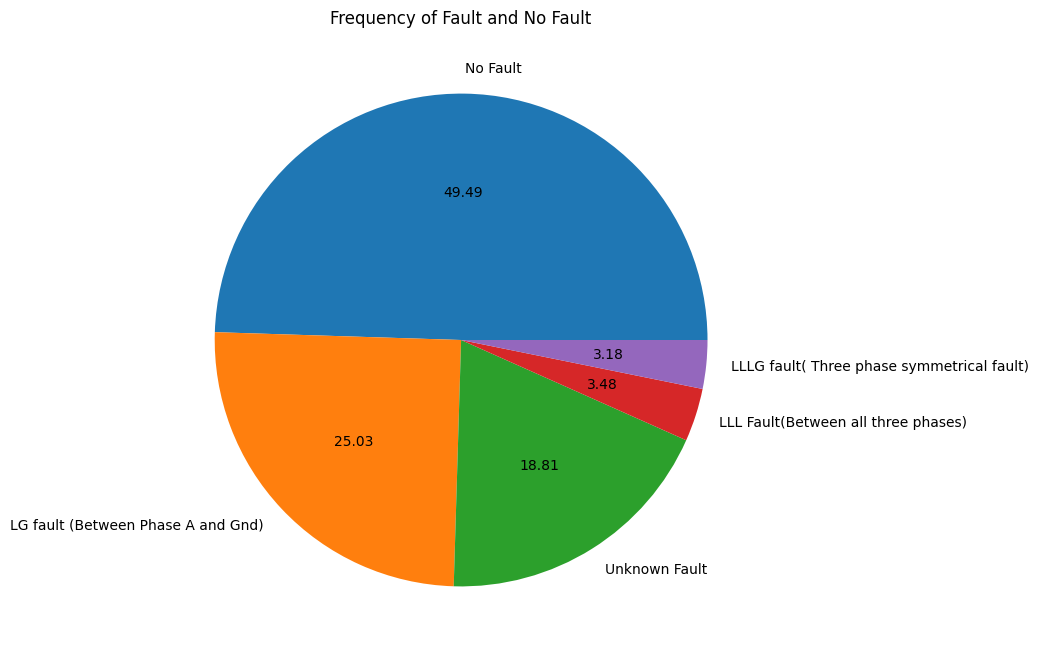

In [20]:
# Memeriksa Frekuensi kemunculan jenis jenis fault
plt.figure(figsize=(8, 8))
plt.pie(detect_fault['Output'].value_counts(), autopct='%0.2f', labels=detect_fault['Output'].value_counts().index)
plt.title('Frequency of Fault and No Fault')
plt.show()

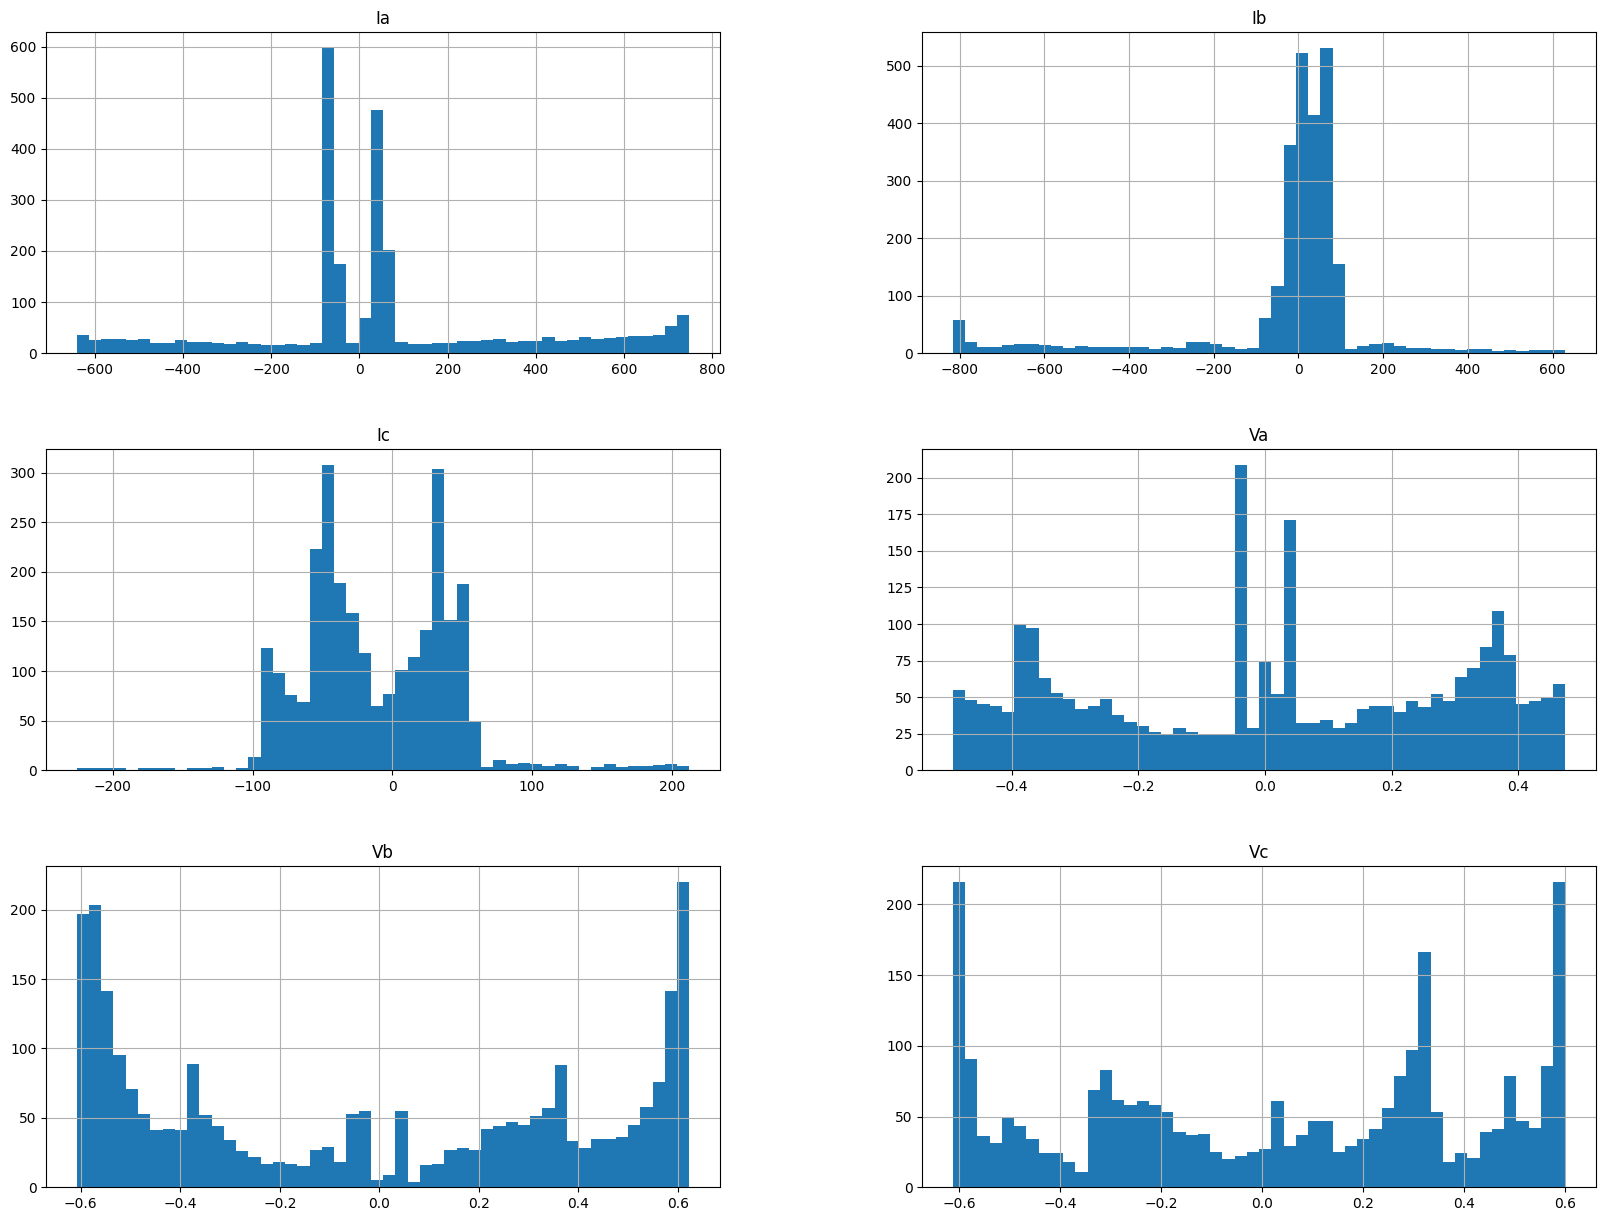

In [21]:
# Memeriksa masing - masing fitur menggunakan histogram
detect_fault.hist(bins=50, figsize=(20,15))
plt.show()

#### 2.2.3. EDA - Multivariate Analysis

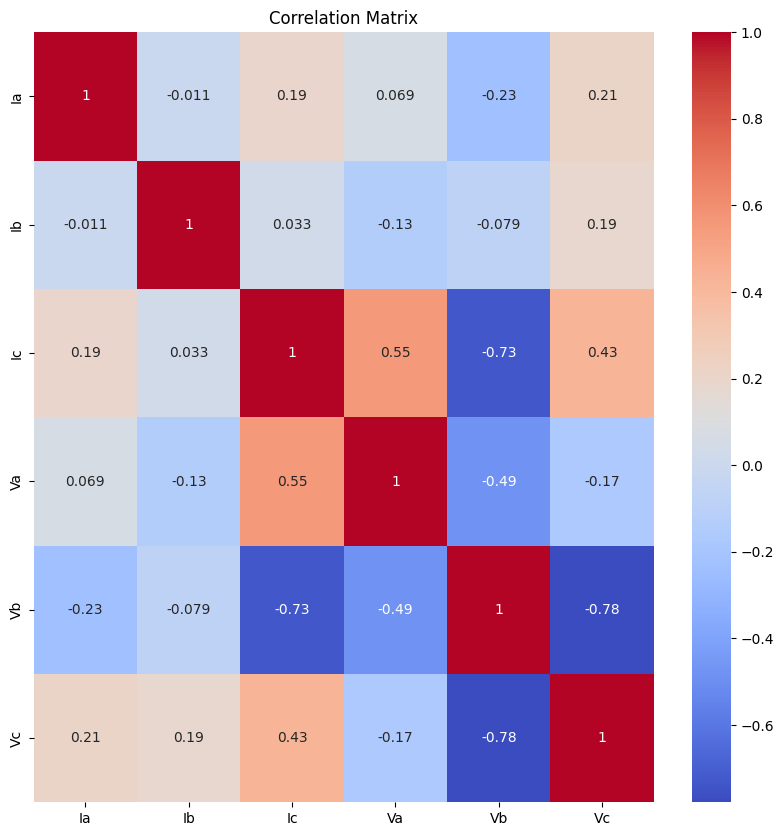

In [22]:
# Memeriksa korelasi antar kolom
numeric_cols = detect_fault.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = detect_fault[numeric_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3.Data Preparation

In [23]:
Encoder = LabelEncoder()
detect_fault['Output'] = Encoder.fit_transform(detect_fault['Output'].values)

# Menampilkan jenis gangguan
print(Encoder.classes_)

# Menampilkan nilai numerik untuk setiap jenis gangguan
for i, class_label in enumerate(Encoder.classes_):
    print(f"{class_label} is encoded as: {i}")
    print(f"Encoded value {i} corresponds to: {Encoder.inverse_transform([i])[0]}")

['LG fault (Between Phase A and Gnd)'
 'LLL Fault(Between all three phases)'
 'LLLG fault( Three phase symmetrical fault)' 'No Fault' 'Unknown Fault']
LG fault (Between Phase A and Gnd) is encoded as: 0
Encoded value 0 corresponds to: LG fault (Between Phase A and Gnd)
LLL Fault(Between all three phases) is encoded as: 1
Encoded value 1 corresponds to: LLL Fault(Between all three phases)
LLLG fault( Three phase symmetrical fault) is encoded as: 2
Encoded value 2 corresponds to: LLLG fault( Three phase symmetrical fault)
No Fault is encoded as: 3
Encoded value 3 corresponds to: No Fault
Unknown Fault is encoded as: 4
Encoded value 4 corresponds to: Unknown Fault


<ipython-input-23-15612fd7e127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_fault['Output'] = Encoder.fit_transform(detect_fault['Output'].values)


In [25]:
# Mendefinisikan X merupakan dataset yang digunakan dan menghapus kolom 'output (s)'
X = detect_fault.drop(["Output"],axis =1)

# Mendefiniskan y merupakan dataset yang hanya terdiri dari kolom 'output (s)
y = detect_fault["Output"]

In [26]:
# Melakukan imbalance pada masing - masing class
smote = SMOTE()
x, Y = smote.fit_resample(X,y)

### 3.1. Train-test split

In [27]:
# Melakukan split dataset
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42)

In [28]:
# Menampilkan total masing-masing dataset yang telah di split
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2669
Total # of sample in train dataset: 5284
Total # of sample in test dataset: 1321


### 3.2. Standarisasi

In [29]:
# Melakukan standarisasi data
numerical_features = ['Ia', 'Ib', 'Ic', "Va", "Vb", "Vc"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Ia,Ib,Ic,Va,Vb,Vc
1831,-0.391122,0.376818,-0.766653,1.199987,1.062516,-2.158622
1807,-0.618602,0.427611,0.458385,1.701347,-0.974378,-0.057148
5100,1.252191,0.660662,0.199040,0.168701,-0.620437,0.628487
3773,0.644177,-1.042309,0.263939,-0.033572,-0.904199,1.119057
6230,-0.379795,-0.124853,2.010999,1.585295,0.479479,-1.732870


## 4.Model Development

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement

In [30]:
# Mempersiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'DecisionTree'])

### 4.1.Membuat Model dengan Algoritma KNN

In [31]:
# Membuat model dengan Algoritma KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### 4.2.Membuat Model dengan Algoritma RandomForest

In [32]:
# Membuat model dengan Algoritma RandomForest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### 4.3. Membuat Model dengan Algoritma Decision Tree

In [33]:
# Membuat model dengan algoritma Decision Tree
DT = DecisionTreeRegressor(max_depth=16, random_state=55)
DT.fit(X_train, y_train)

models.loc['train_mse','DecisionTree'] = mean_squared_error(y_pred=DT.predict(X_train), y_true=y_train)

## 5.Evaluasi Model

In [34]:
# Melakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [35]:
# Membuat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF', 'DT'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'DT':DT}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
mse

,train,test
KNN,0.052246,0.080522
RF,0.007357,0.02612
DT,0.011789,0.047253


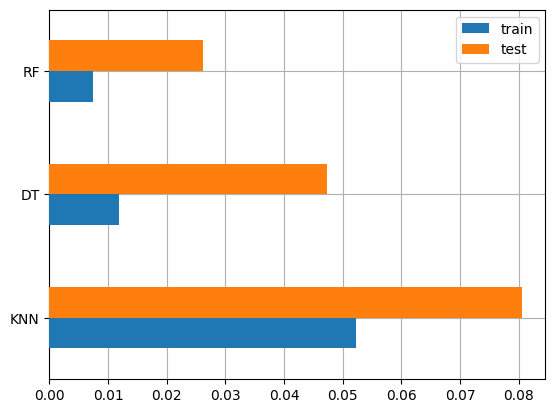

In [36]:
# Melakukan plot metrik dengan menggunakan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [37]:
# Pengujian Model
# Pengujian Model
prediksi = X_test.iloc[2:3].copy()
pred_dict = {'y_true':y_test[2:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_DT
239,0,0.0,0.0,0.0


In [38]:
# Pengujian Model terhadap keseluruhan dataset
# Pengujian Model terhadap keseluruhan dataset
prediksi = X_test.copy()
pred_dict = {'y_true':y_test}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_DT
1483,3,3.0,3.0,3.0
4999,2,2.0,2.0,2.0
239,0,0.0,0.0,0.0
5396,2,2.0,2.0,2.0
3034,0,0.0,0.0,0.0
...,...,...,...,...
1268,2,1.9,2.0,2.0
414,0,0.0,0.1,0.0
5369,2,2.0,2.0,2.0
654,0,0.0,0.0,0.0
